In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from scipy import stats

In [2]:
data=pd.read_csv("heart_disease.csv")

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [4]:
data.shape

(908, 13)

In [5]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
data.dropna()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,51,Male,asymptomatic,110,0,True,normal,92,FALSE,0.0,flat,fixed defect,4
902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,TRUE,3.0,flat,reversable defect,4
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4


In [8]:
data['oldpeak'].fillna(data['oldpeak'].mean())

0      2.300000
1      0.000000
2      0.400000
3      0.000000
4      1.500000
         ...   
903    1.500000
904    3.000000
905    2.500000
906    0.891253
907    0.891253
Name: oldpeak, Length: 908, dtype: float64

In [9]:
data.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [10]:
data['oldpeak'].fillna(data['oldpeak'].mean(), inplace=True)

C:\Users\datta\AppData\Local\Temp\ipykernel_7660\3105853988.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['oldpeak'].fillna(data['oldpeak'].mean(), inplace=True)


<Axes: >

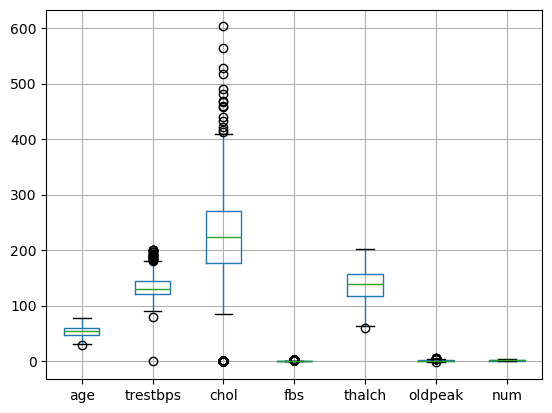

In [11]:
data.boxplot()

In [12]:
encoded_data = pd.get_dummies(data)


In [13]:
encoded_data

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.300000,0,False,True,False,...,False,True,False,False,True,False,False,True,False,False
1,41,135,203,False,132,0.000000,0,False,True,False,...,False,True,False,False,False,True,False,True,False,False
2,57,140,192,False,148,0.400000,0,False,True,True,...,False,True,False,False,False,True,False,True,False,False
3,52,118,186,False,190,0.000000,0,False,True,False,...,False,True,False,False,False,True,False,True,False,False
4,57,110,201,False,126,1.500000,0,False,True,True,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,4,False,True,True,...,False,True,False,False,False,False,True,True,False,False
904,62,166,170,False,120,3.000000,4,False,True,True,...,True,False,True,False,False,True,False,False,True,False
905,56,170,0,False,123,2.500000,4,False,True,False,...,False,False,True,False,True,False,False,False,True,False
906,56,144,208,True,105,0.891253,4,False,True,False,...,True,False,False,True,True,False,False,True,False,False


In [14]:
encoded_data.dtypes

age                           int64
trestbps                      int64
chol                          int64
fbs                            bool
thalch                        int64
oldpeak                     float64
num                           int64
sex_Female                     bool
sex_Male                       bool
cp_asymptomatic                bool
cp_atypical angina             bool
cp_non-anginal                 bool
cp_typical angina              bool
restecg_lv hypertrophy         bool
restecg_normal                 bool
restecg_st-t abnormality       bool
exang_FALSE                    bool
exang_TRUE                     bool
exang_TURE                     bool
slope_downsloping              bool
slope_flat                     bool
slope_upsloping                bool
thal_fixed defect              bool
thal_normal                    bool
thal_reversable defect         bool
dtype: object

In [15]:
df=pd.DataFrame(encoded_data)

#### detecting outliers

In [17]:

z_scores=(df - np.mean(df))/np.std(df)
outliers=df[np.abs(z_scores)>3]
outliers

E:\LDPlayer\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63.0,145.0,NaN,True,150.0,2.300000,0,False,True,False,...,False,True,False,False,True,False,False,True,False,False
1,NaN,135.0,NaN,False,132.0,0.000000,0,False,True,False,...,False,True,False,False,False,True,False,True,False,False
2,57.0,140.0,NaN,False,148.0,0.400000,0,False,True,True,...,False,True,False,False,False,True,False,True,False,False
3,52.0,118.0,NaN,False,190.0,0.000000,0,False,True,False,...,False,True,False,False,False,True,False,True,False,False
4,57.0,110.0,NaN,False,126.0,1.500000,0,False,True,True,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53.0,125.0,NaN,False,120.0,1.500000,4,False,True,True,...,False,True,False,False,False,False,True,True,False,False
904,62.0,166.0,NaN,False,120.0,3.000000,4,False,True,True,...,True,False,True,False,False,True,False,False,True,False
905,56.0,170.0,NaN,False,123.0,2.500000,4,False,True,False,...,False,False,True,False,True,False,False,False,True,False
906,56.0,144.0,NaN,True,105.0,0.891253,4,False,True,False,...,True,False,False,True,True,False,False,True,False,False


In [18]:
outliers.boxplot()

<Axes: >

#### Feature scalling

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)

In [22]:
scaled_data

array([[ 1.00602683,  0.56739446,  0.28129674, ...,  1.97020822,
        -0.78830741, -0.83688382],
       [-1.39756029,  0.07696688,  0.01352615, ...,  1.97020822,
        -0.78830741, -0.83688382],
       [ 0.35050307,  0.32218067, -0.0846564 , ...,  1.97020822,
        -0.78830741, -0.83688382],
       ...,
       [ 0.24124911,  1.7934634 , -1.79838815, ..., -0.50756057,
         1.26854066, -0.83688382],
       [ 0.24124911,  0.5183517 ,  0.05815458, ...,  1.97020822,
        -0.78830741, -0.83688382],
       [ 0.35050307,  0.42026619,  0.67402693, ..., -0.50756057,
         1.26854066, -0.83688382]])

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [75]:
X = data.drop("restecg", axis=1)  # Drop the target column from the features
y = data["restecg"] 

In [77]:
y

0        lv hypertrophy
1                normal
2                normal
3        lv hypertrophy
4                normal
             ...       
903              normal
904    st-t abnormality
905      lv hypertrophy
906    st-t abnormality
907    st-t abnormality
Name: restecg, Length: 908, dtype: object

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=41)

In [81]:
dtr=DecisionTreeClassifier(max_depth=3,random_state=42)
dtr.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

In [83]:
y_pred=dtr.predict(x_test)

In [85]:
y_pred

array(['st-t abnormality', 'normal', 'normal', 'normal', 'normal',
       'st-t abnormality', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'st-t abnormality',
       'normal', 'normal', 'normal', 'normal', 'normal', 'norm

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
print(classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

  lv hypertrophy       0.00      0.00      0.00        47
          normal       0.60      0.96      0.74       160
st-t abnormality       0.43      0.09      0.15        66

        accuracy                           0.59       273
       macro avg       0.34      0.35      0.30       273
    weighted avg       0.45      0.59      0.47       273



In [93]:
dtr.score(x_train,y_train), dtr.score(x_test,y_test)

(0.6173228346456693, 0.5860805860805861)

In [105]:
# Hyperparamiter tunning

In [107]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [109]:
from sklearn.model_selection import GridSearchCV

In [119]:
params={
     "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": np.arange(2, 10),
    "min_samples_leaf": np.arange(1, 5),
}

In [121]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,
                   verbose=1)

In [123]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=1)

In [125]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [127]:
dtr = DecisionTreeClassifier(criterion='absolute_error',
                           max_depth=8,splitter='random')

In [163]:
#dtr.fit(x_train,y_train)
#ypred  = dtr.predict(x_test)

In [165]:
clf = DecisionTreeClassifier(criterion='gini', random_state=42)


In [166]:
clf.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

In [167]:
y_pred = clf.predict(x_test)


In [157]:
y_pred

array(['normal', 'lv hypertrophy', 'normal', 'lv hypertrophy',
       'lv hypertrophy', 'st-t abnormality', 'lv hypertrophy', 'normal',
       'lv hypertrophy', 'st-t abnormality', 'st-t abnormality', 'normal',
       'normal', 'normal', 'normal', 'normal', 'st-t abnormality',
       'st-t abnormality', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'lv hypertrophy',
       'lv hypertrophy', 'normal', 'lv hypertrophy', 'lv hypertrophy',
       'st-t abnormality', 'normal', 'lv hypertrophy', 'normal',
       'st-t abnormality', 'normal', 'lv hypertrophy', 'lv hypertrophy',
       'normal', 'st-t abnormality', 'normal', 'normal', 'lv hypertrophy',
       'st-t abnormality', 'st-t abnormality', 'normal', 'normal',
       'normal', 'lv hypertrophy', 'normal', 'lv hypertrophy',
       'lv hypertrophy', 'normal', 'normal', 'lv hypertrophy',
       'lv hypertrophy', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'st-t abnormality', '

In [139]:
from sklearn import tree


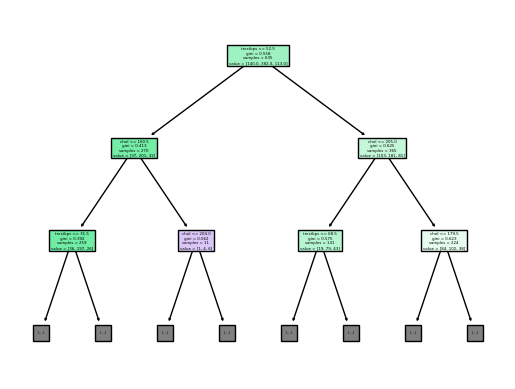

In [161]:
tree.plot_tree(clf, feature_names=['trestbps', 'chol', 'chol'],filled=True, max_depth =2 )
plt.show()